<a href="https://colab.research.google.com/github/anant-ecaps/Basics/blob/master/LIVEWEBINAR_basicCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#05-06-2020 PROJECT2
import tensorflow as tf

In [0]:
fashion_mnist=tf.keras.datasets.fashion_mnist     #tf=tensorflow keras=api
(x_train,y_train),(x_test,y_test)=fashion_mnist.load_data()       #loading data

In [9]:
x_train.shape     #values in training data. #60000 images, 28x28 pixels

(60000, 28, 28)

In [10]:
x_train[0].shape        #shape of one image

(28, 28)

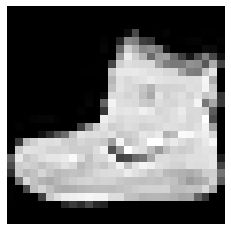

In [11]:
#to display picture
import matplotlib.pyplot as plt
plt.imshow(x_train[0],cmap='gray')
plt.axis('off')
plt.show()

In [12]:
x_train[0]          #28x28=784 values of pixel

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [13]:
x_train.min()


0

In [14]:
x_train.max()

255

In [0]:
#normalization
x_train=x_train/255
x_test=x_test/255

In [0]:
x_train=x_train.reshape(60000,28,28,1)
x_test=x_test.reshape(10000,28,28,1)        #the pixels are in single dimenson

In [17]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [18]:
y_train.size

60000

In [0]:
class_names=['T-shirt','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle Boot']

In [0]:
from tensorflow.keras.utils import to_categorical         #one hot encoding

In [0]:
y_cat_train=to_categorical(y_train)

In [22]:
y_train[23]

8

In [23]:
y_cat_train[23]

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.], dtype=float32)

In [0]:
y_cat_test=to_categorical(y_test)

In [0]:
#CNN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten
model= Sequential()
#CONVOLUTIONAL LAYER
model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(28,28,1),activation='relu'))       #kernel_size defines no. of pixels 4x4
#MAX POOLING
model.add(MaxPool2D(pool_size=(2,2)))
#FLATTEN
model.add(Flatten())
#DENSE LAYERS
model.add(Dense(128,activation='relu'))
#OUTPUT LAYER
model.add(Dense(10,activation='softmax'))
#COMPILE
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [26]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 25, 25, 32)        544       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               589952    
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1290      
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
_________________________________________________________________


In [27]:
model.fit(x_train,y_cat_train,epochs=5)       #training

Epoch 1/5
1875/1875 [==============================] - 34s 18ms/step - loss: 0.4069 - accuracy: 0.8550
Epoch 2/5
1875/1875 [==============================] - 33s 18ms/step - loss: 0.2802 - accuracy: 0.8986
Epoch 3/5
1875/1875 [==============================] - 33s 18ms/step - loss: 0.2352 - accuracy: 0.9130
Epoch 4/5
1875/1875 [==============================] - 33s 18ms/step - loss: 0.2043 - accuracy: 0.9236
Epoch 5/5
1875/1875 [==============================] - 33s 18ms/step - loss: 0.1734 - accuracy: 0.9350


Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
[6]


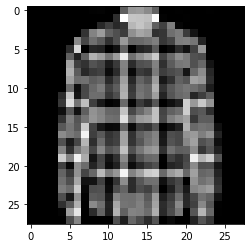

Shirt


In [28]:
i=7           #change values from 0-9
result= model.predict_classes(x_test[i].reshape(1,28,28,1))
print(result)
plt.imshow(x_test[i].reshape(28,28),cmap='gray')
plt.show()
print(class_names[result[0]])